# Análisis descriptivo

Antes de aplicar modelos de clasificación, es fundamental realizar un análisis descriptivo de los datos. En este caso, el conjunto contiene 33,716 mensajes categorizados como "spam" o "ham" (no spam). Cada fila representa un mensaje, acompañado de su categoría, longitud del texto (message_length) y una etiqueta numérica (Label) donde 0 corresponde a ham y 1 a spam.

Este análisis permitirá entender mejor la distribución y características de los datos, identificar patrones relevantes, y detectar posibles valores atípicos o inconsistencias que puedan afectar el rendimiento del modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from util.open_data import open_data

df = open_data()
df

,text,Spam/Ham,message_length,Label
0,christmas tree farm pictures,ham,29,0
1,"vastar resources , inc . gary , production fro...",ham,4307,0
2,calpine daily gas nomination - calpine daily g...,ham,67,0
3,re : issue fyi - see note below - already done...,ham,1182,0
4,meter 7268 nov allocation fyi .\n- - - - - - -...,ham,1150,0
...,...,...,...,...
33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,spam,364,1
33712,all prescript medicines are on special . to be...,spam,903,1
33713,the next generation online pharmacy . are you ...,spam,355,1
33714,bloow in 5 - 10 times the time learn how to la...,spam,105,1


## Distribución de Spam vs Ham

Este gráfico de barras muestra la distribución de mensajes clasificados como "spam" y "ham" (no spam) en un conjunto de datos. Se puede observar que:
   - Ambas categorías tienen un número similar de mensajes.
   - La categoría "spam" tiene ligeramente más mensajes que "ham" (aproximadamente 17,000 frente a 16,500).
   - Esto indica que este conjunto de datos es balanceado, lo cual es favorable para el entrenamiento de modelos de clasificación, ya que evita un sesgo hacia una de las clases.

Text(0.5, 1.0, 'Distribución de Spam vs Ham')

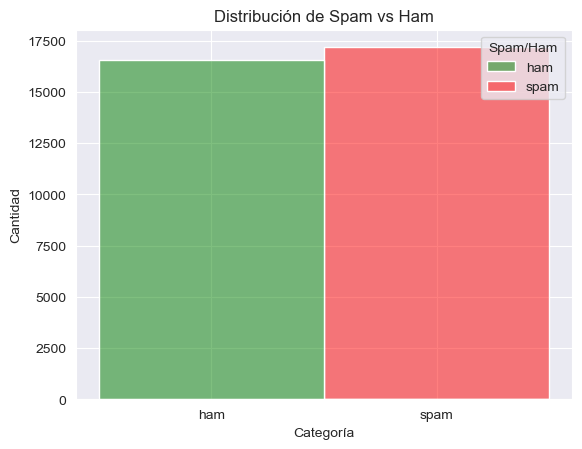

In [2]:
sns.histplot(data = df,
             x = 'Spam/Ham',
             hue='Spam/Ham',
             palette={'spam': 'red', 'ham': 'green'})
plt.ylabel('Cantidad')
plt.xlabel('Categoría')
plt.title('Distribución de Spam vs Ham')

## Longitud de los mensajes

Se observa que la mayoría de los mensajes tienen una longitud relativamente corta, aunque existen valores atípicos con longitudes elevadas que distorsionan la visualización general. Para lograr una representación más clara y adecuada de los datos, es necesario aplicar un filtro que elimine los mensajes atípicamente largos y así centrar el análisis en la distribución principal.

Text(0.5, 0, 'Longitud')

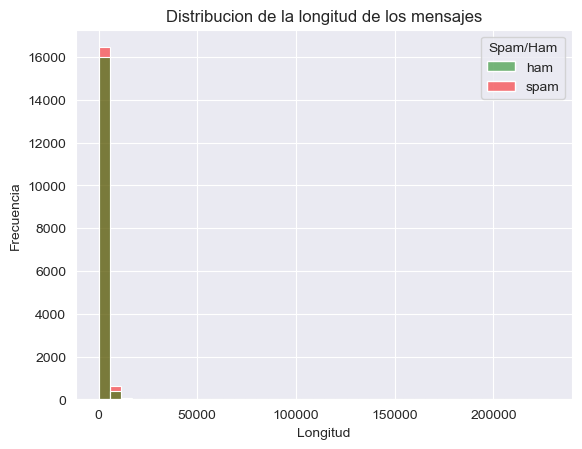

In [3]:
df['email_length'] = df['text'].apply(len)

sns.histplot(data=df, x='email_length', hue='Spam/Ham',
             bins=40, palette={'spam': 'red', 'ham': 'green'})
plt.title('Distribucion de la longitud de los mensajes')
plt.ylabel('Frecuencia')
plt.xlabel('Longitud')

Para mejorar la visualización de la distribución de la longitud de los mensajes, se aplicó un filtro que excluye aquellos con más de 5000 caracteres, ya que representaban valores atípicos que distorsionaban la escala del gráfico original. Este histograma filtrado permite observar con mayor claridad el comportamiento general del conjunto de datos. Se observa que:

 - La mayoría de los mensajes, tanto ham como spam, tienen una longitud inferior a los 1000 caracteres, concentrándose en el rango de 0 a 500.
 - Los mensajes spam tienden ligeramente a ser más extensos que los ham.
 - La distribución de ambos tipos de mensaje decrece conforme aumenta la longitud, lo que indica que los mensajes largos son menos frecuentes en el cojunto de datos.

Text(0, 0.5, 'Frecuencia')

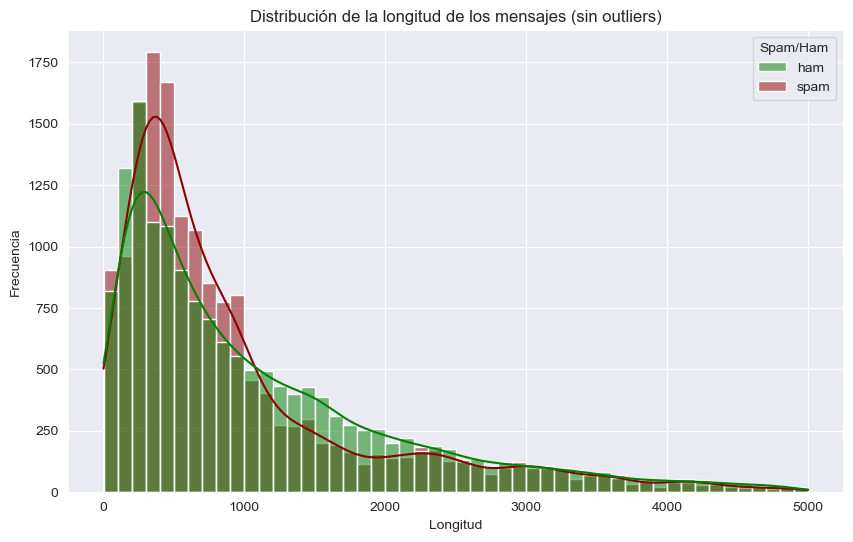

In [4]:
filtered_df = df[df['message_length'] < 5000]

plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df, x='message_length', hue='Spam/Ham', bins=50,
             palette={'ham':'green', 'spam':'darkred'}, kde=True)
plt.title('Distribución de la longitud de los mensajes (sin outliers)')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')

Se calcularon la media y la mediana de la longitud de los mensajes para cada categoría, tras eliminar los outliers. Los resultados obtenidos fueron los siguientes:

In [5]:
stats = filtered_df.groupby('Spam/Ham')['message_length'].agg(['mean', 'median']).reset_index()
print(stats)


  Spam/Ham         mean  median
0      ham  1093.549918   741.0
1     spam   956.615856   614.0


Aunque el histograma sugería que los mensajes spam tendían a ser más largos, las estadísticas descriptivas revelan lo contrario: los mensajes ham tienen en promedio mayor longitud que los spam. Esto puede deberse a la presencia de ciertos mensajes ham extensos que elevan la media. La diferencia también se refleja en la mediana, aunque de forma menos pronunciada.